# 分析国内老师与外教的工资差距情况

## 一、查看数据

数据由6个csv文件组成，分别包含着4个教育机构以及外教和其归属地的信息，总共约有10000行数据，8列属性

## 二、导入库

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import calendar

## 三、读取数据

In [53]:
df_yey=pd.read_csv('F:\Data\ESL\幼儿园.csv')
df_zxx=pd.read_csv('F:\Data\ESL\中小学.csv')
df_wypx=pd.read_csv('F:\Data\ESL\外语培训.csv')
df_zyyx=pd.read_csv('F:\Data\ESL\职业院校.csv')

## 四、查看数据

In [54]:
df_yey.head()

,area,company,exp_title,link,salary,title,update_time
0,江苏-苏州-相城区,苏州外国语学校相城校区,不限/大专,/jobs_view_357652.html,10W-12W/年,幼儿英语教师,2019/04/04
1,福建-莆田,莆田市实验学校,不限/不限,/jobs_view_370922.html,3.5K-7K/月,幼儿英语教师,2019/04/03
2,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_409343.html,6K-10K/月,急聘英语教师（惠州河南岸南翠花园）,2019/04/06
3,广东-深圳-龙岗区,树童教育集团,一年以上/大学本科,/jobs_view_402974.html,8K-12K/月,英语老师（深圳横岗分校）,2019/04/06
4,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_408457.html,5K-10K/月,急聘英语教师（惠州麦地麦景新苑）,2019/04/06


In [55]:
df_yey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         189 non-null    object
 1   company      189 non-null    object
 2   exp_title    189 non-null    object
 3   link         189 non-null    object
 4   salary       189 non-null    object
 5   title        189 non-null    object
 6   update_time  189 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [56]:
df_zxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         5178 non-null   object
 1   company      5178 non-null   object
 2   exp_title    5178 non-null   object
 3   link         5178 non-null   object
 4   salary       5178 non-null   object
 5   title        5178 non-null   object
 6   update_time  5178 non-null   object
dtypes: object(7)
memory usage: 283.3+ KB


In [57]:
df_wypx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         392 non-null    object
 1   company      392 non-null    object
 2   exp_title    392 non-null    object
 3   link         392 non-null    object
 4   salary       392 non-null    object
 5   title        392 non-null    object
 6   update_time  392 non-null    object
dtypes: object(7)
memory usage: 21.6+ KB


In [58]:
df_zyyx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         28 non-null     object
 1   company      28 non-null     object
 2   exp_title    28 non-null     object
 3   link         28 non-null     object
 4   salary       28 non-null     object
 5   title        28 non-null     object
 6   update_time  28 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


## 五、数据清洗

### 添加一列，用于区分每个学历

In [59]:
df_yey['type']='幼儿园'
df_zxx['type']='中小学'
df_wypx['type']='外语培训'
df_zyyx['type']='职业院校'

### 数据合并

In [60]:
df=pd.concat([df_yey, df_zxx, df_wypx, df_zyyx])

### 查看数据

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 0 to 27
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         5787 non-null   object
 1   company      5787 non-null   object
 2   exp_title    5787 non-null   object
 3   link         5787 non-null   object
 4   salary       5787 non-null   object
 5   title        5787 non-null   object
 6   update_time  5787 non-null   object
 7   type         5787 non-null   object
dtypes: object(8)
memory usage: 406.9+ KB


In [62]:
df.shape

(5787, 8)

In [63]:
df.head()

,area,company,exp_title,link,salary,title,update_time,type
0,江苏-苏州-相城区,苏州外国语学校相城校区,不限/大专,/jobs_view_357652.html,10W-12W/年,幼儿英语教师,2019/04/04,幼儿园
1,福建-莆田,莆田市实验学校,不限/不限,/jobs_view_370922.html,3.5K-7K/月,幼儿英语教师,2019/04/03,幼儿园
2,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_409343.html,6K-10K/月,急聘英语教师（惠州河南岸南翠花园）,2019/04/06,幼儿园
3,广东-深圳-龙岗区,树童教育集团,一年以上/大学本科,/jobs_view_402974.html,8K-12K/月,英语老师（深圳横岗分校）,2019/04/06,幼儿园
4,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_408457.html,5K-10K/月,急聘英语教师（惠州麦地麦景新苑）,2019/04/06,幼儿园


In [64]:
df.type.value_counts()

中小学     5178
外语培训     392
幼儿园      189
职业院校      28
Name: type, dtype: int64

In [65]:
df

,area,company,exp_title,link,salary,title,update_time,type
0,江苏-苏州-相城区,苏州外国语学校相城校区,不限/大专,/jobs_view_357652.html,10W-12W/年,幼儿英语教师,2019/04/04,幼儿园
1,福建-莆田,莆田市实验学校,不限/不限,/jobs_view_370922.html,3.5K-7K/月,幼儿英语教师,2019/04/03,幼儿园
2,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_409343.html,6K-10K/月,急聘英语教师（惠州河南岸南翠花园）,2019/04/06,幼儿园
3,广东-深圳-龙岗区,树童教育集团,一年以上/大学本科,/jobs_view_402974.html,8K-12K/月,英语老师（深圳横岗分校）,2019/04/06,幼儿园
4,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_408457.html,5K-10K/月,急聘英语教师（惠州麦地麦景新苑）,2019/04/06,幼儿园
...,...,...,...,...,...,...,...,...
23,湖北-黄石-大冶市,大冶市职业技术学校,一年以上/大学本科以上,/jobs_view_423624.html,3.5K-5.5K/月,英语教师,2019/03/28,职业院校
24,上海-宝山区,天坤国际教育集团,不限/大专以上,/jobs_view_429563.html,4K-6.5K/月,英语教育-成都纬创,2019/03/25,职业院校
25,广东-清远-英德市,广东英德华粤教育集团,不限/大学本科以上,/jobs_view_414172.html,6K-7.5K/月,英语教师,2019/03/21,职业院校
26,江苏-苏州-昆山市,苏州福纳影视艺术学校,不限/大学本科以上,/jobs_view_414649.html,4K-8K/月,英语老师,2019/01/16,职业院校


### 重新设置索引

In [66]:
df=df.reset_index()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        5787 non-null   int64 
 1   area         5787 non-null   object
 2   company      5787 non-null   object
 3   exp_title    5787 non-null   object
 4   link         5787 non-null   object
 5   salary       5787 non-null   object
 6   title        5787 non-null   object
 7   update_time  5787 non-null   object
 8   type         5787 non-null   object
dtypes: int64(1), object(8)
memory usage: 407.0+ KB


### drop index 列

In [68]:
df.drop('index',axis=1,inplace=True)

### 对area列进行处理

In [69]:
df.area

0       江苏-苏州-相城区
1           福建-莆田
2       广东-惠州-惠城区
3       广东-深圳-龙岗区
4       广东-惠州-惠城区
          ...    
5782    湖北-黄石-大冶市
5783       上海-宝山区
5784    广东-清远-英德市
5785    江苏-苏州-昆山市
5786    广东-广州-花都区
Name: area, Length: 5787, dtype: object

In [70]:
# 提取省份和城市
df['province']=df.area.str[:2]
df['city']=df.area.str[3:5]

In [71]:
# 对个别省份进行处理
df.loc[df.province=='北京','city']='北京'
df.loc[df.province=='上海','city']='上海'
df.loc[df.province=='天津','city']='天津'
df.loc[df.province=='重庆','city']='重庆'

In [72]:
df.province.value_counts()

广东    2055
浙江     864
湖北     296
江苏     292
上海     290
安徽     265
北京     208
四川     186
贵州     170
江西     154
福建     141
河北     118
湖南     112
山东      99
重庆      82
海南      77
云南      64
河南      62
山西      58
广西      49
天津      37
陕西      29
辽宁      25
黑龙      16
内蒙      11
甘肃      10
吉林       6
青海       5
新疆       4
宁夏       2
Name: province, dtype: int64

In [73]:
df.city.value_counts()

广州    557
东莞    406
深圳    337
上海    290
杭州    290
     ... 
乐东      1
河池      1
保山      1
大同      1
临高      1
Name: city, Length: 219, dtype: int64

### 对exp_title列进行处理

In [74]:
df.exp_title

0             不限/大专
1             不限/不限
2       一年以上/大学本科以上
3         一年以上/大学本科
4       一年以上/大学本科以上
           ...     
5782    一年以上/大学本科以上
5783        不限/大专以上
5784      不限/大学本科以上
5785      不限/大学本科以上
5786      不限/大学本科以上
Name: exp_title, Length: 5787, dtype: object

In [75]:
# 提取工作经验和学历
df['exp']=df.exp_title.str.split('/').str[0]
df['degree']=df.exp_title.str.split('/').str[1]

对exp进行处理

In [76]:
df.exp.unique()

array(['不限', '一年以上', '三年以上', '两年以上', '五年以上', '应届毕业生', '六年以上', '四年以上',
       '九年以上', '七年以上', '十年以上', '在读学生', '八年以上'], dtype=object)

In [77]:
exp_map = {'不限':'经验不限', '一年以上':'一到三年', '三年以上':'三到五年', '两年以上':'一到三年',
           '五年以上':'五到十年', '应届毕业生':'经验不限', '六年以上':'五到十年', '四年以上':'三到五年',
           '九年以上':'五到十年', '七年以上':'五到十年', '十年以上':'十年以上', '在读学生':'经验不限',
           '八年以上':'五到十年'}

In [78]:
df['exp'] = df['exp'].map(exp_map)

In [79]:
df.exp.value_counts()

经验不限    3740
一到三年    1252
三到五年     581
五到十年     186
十年以上      28
Name: exp, dtype: int64

对degree进行处理

In [80]:
df.degree.unique()

array(['大专', '不限', '大学本科以上', '大学本科', '大专以上', '不限以上', '中专以上', '硕士以上', '硕士',
       '高中以上', '中专'], dtype=object)

In [81]:
degree_map = {'大专':'大专', '不限':'学历不限', '大学本科以上':'本科', '大学本科':'本科',
              '大专以上':'大专', '不限以上':'学历不限', '中专以上':'中专', '硕士以上':'硕士',
              '硕士':'硕士', '高中以上':'高中', '中专':'中专'}

In [82]:
df['degree'] = df['degree'].map(degree_map)

In [83]:
df.degree.value_counts()

本科      3833
大专      1491
学历不限     415
硕士        31
中专        16
高中         1
Name: degree, dtype: int64

### 查看数据

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         5787 non-null   object
 1   company      5787 non-null   object
 2   exp_title    5787 non-null   object
 3   link         5787 non-null   object
 4   salary       5787 non-null   object
 5   title        5787 non-null   object
 6   update_time  5787 non-null   object
 7   type         5787 non-null   object
 8   province     5787 non-null   object
 9   city         5787 non-null   object
 10  exp          5787 non-null   object
 11  degree       5787 non-null   object
dtypes: object(12)
memory usage: 542.7+ KB


In [85]:
df.head()

,area,company,exp_title,link,salary,title,update_time,type,province,city,exp,degree
0,江苏-苏州-相城区,苏州外国语学校相城校区,不限/大专,/jobs_view_357652.html,10W-12W/年,幼儿英语教师,2019/04/04,幼儿园,江苏,苏州,经验不限,大专
1,福建-莆田,莆田市实验学校,不限/不限,/jobs_view_370922.html,3.5K-7K/月,幼儿英语教师,2019/04/03,幼儿园,福建,莆田,经验不限,学历不限
2,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_409343.html,6K-10K/月,急聘英语教师（惠州河南岸南翠花园）,2019/04/06,幼儿园,广东,惠州,一到三年,本科
3,广东-深圳-龙岗区,树童教育集团,一年以上/大学本科,/jobs_view_402974.html,8K-12K/月,英语老师（深圳横岗分校）,2019/04/06,幼儿园,广东,深圳,一到三年,本科
4,广东-惠州-惠城区,树童教育集团,一年以上/大学本科以上,/jobs_view_408457.html,5K-10K/月,急聘英语教师（惠州麦地麦景新苑）,2019/04/06,幼儿园,广东,惠州,一到三年,本科


### 对salary列进行处理

In [86]:
df.salary.unique()

array(['10W-12W/年', '3.5K-7K/月', '6K-10K/月', '8K-12K/月', '5K-10K/月',
       '8K-15K/月', '5K-8K/月', '7K-10K/月', '8K-10K/月', '6K-8K/月',
       '8W-12W/年', '5K-6K/月', '4K-6K/月', '9W-12W/年', '4.5K-6K/月',
       '4K-8K/月', '8W-8W/年', '4K-5.5K/月', '3K-5K/月', '4.5K-8K/月',
       '2.8K-3.5K/月', '6K-12K/月', '6W-9W/年', '10W-15W/年', '10K-15K/月',
       '4K-7K/月', '3K-6K/月', '8W-8.5W/年', '6K-7.5K/月', '9K-18K/月',
       '0.8W-1W/年', '2K-3K/月', '6W-12W/年', '7K-12K/月', '2.6K-5K/月',
       '6W-8W/年', '5.5K-5.7K/月', '6.4K-8.4K/月', '3.5K-6K/月', '6.5W-10W/年',
       '3.8K-5K/月', '8W-15W/年', '12K-22K/月', '10K-16K/月', '3.5K-8K/月',
       '1.8K-4K/月', '3K-4K/月', '4W-8W/年', '5W-10W/年', '5K-7K/月',
       '4.8W-8W/年', '2K-4K/月', '10K-14K/月', '3.5K-4.6K/月', '10W-20W/年',
       '2.5K-3K/月', '4.5W-6.5W/年', '面议', '3.5K-4.5K/月', '8W-16W/年',
       '4W-7W/年', '3K-4.5K/月', '4W-6W/年', '8K-16K/月', '9W-16W/年',
       '7.5W-13W/年', '20K-28K/月', '7K-11K/月', '5W-6W/年', '13W-13W/年',
       '3.5K-4K/月', '2K-2K/月', '9W-18W/年'

In [87]:
# 统一单位为K，需要对K和W为单位的值进行转化
def sal(salary):
    if '-' in str(salary):
        low=salary.split('-')[0][:-1]
        high=salary.split('-')[1][:-3]
        if 'K' in salary and '月' in salary:
            return (float(low)+float(high))/2
        if 'W' in salary and '年' in salary:
            return (float(low)+float(high))/2*10/12
        if 'K' not in salary and '月' in salary:
            return (float(low)+float(high))/2000
        else:
            return salary
    else:
        return np.nan
df.salary=round(df.salary.apply(sal),2)

In [88]:
df.salary

0        9.17
1        5.25
2        8.00
3       10.00
4        7.50
        ...  
5782     4.50
5783     5.25
5784     6.75
5785     6.00
5786     6.50
Name: salary, Length: 5787, dtype: float64

In [89]:
df.salary.value_counts()

7.50     531
6.00     429
9.00     378
6.50     299
7.00     292
        ... 
33.34      1
11.96      1
29.50      1
10.25      1
4.95       1
Name: salary, Length: 193, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         5787 non-null   object 
 1   company      5787 non-null   object 
 2   exp_title    5787 non-null   object 
 3   link         5787 non-null   object 
 4   salary       5694 non-null   float64
 5   title        5787 non-null   object 
 6   update_time  5787 non-null   object 
 7   type         5787 non-null   object 
 8   province     5787 non-null   object 
 9   city         5787 non-null   object 
 10  exp          5787 non-null   object 
 11  degree       5787 non-null   object 
dtypes: float64(1), object(11)
memory usage: 542.7+ KB


### 保存文件

In [ ]:
df.to_csv('F:\Data\ESL\Cteacher.csv')

## 处理外教数据

### 导入数据

In [91]:
df_jbl=pd.read_csv('F:\Data\ESL\jobleadchina.csv')

### 查看数据

In [92]:
df_jbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         954 non-null    object
 1   com_type     954 non-null    object
 2   company      954 non-null    object
 3   education    954 non-null    object
 4   exp_title    954 non-null    object
 5   link         954 non-null    object
 6   salary       954 non-null    object
 7   title        954 non-null    object
 8   update_time  954 non-null    object
dtypes: object(9)
memory usage: 67.2+ KB


In [93]:
df_jbl.head()

,area,com_type,company,education,exp_title,link,salary,title,update_time
0,Shanghai,Teaching Center,TutuageHR,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3957,15000K/MTH - 20000K/MTH,Non-native English Speakers in 7 Training Centers,"Post time: April 04, 2019"
1,Others,Others,TALENT WAY,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/3956,13K/MTH - 26K/MTH,The Best Choice for Teachers in China is Talen...,"Post time: April 03, 2019"
2,Guangzhou,Teaching Center,Mengyi Education Inc.,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3954,13K/MTH - 18K/MTH,English Teacher (Kindergarten),"Post time: April 02, 2019"
3,Beijing,Teaching Center,Sara,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3950,10000K/MTH - 20000K/MTH,Native English Teacher Free Accommodation+High...,"Post time: April 02, 2019"
4,Chengdu,Consultancy/Legal/Admin,JMtalent Consulting,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/3942,15K/MTH - 22K/MTH,Native English Teacher,"Post time: March 30, 2019"


### 处理exp_title列

In [95]:
df_jbl.exp_title

0      Experience: Mid-Senior Level
1           Experience: Entry Level
2      Experience: Mid-Senior Level
3      Experience: Mid-Senior Level
4           Experience: Entry Level
                   ...             
949    Experience: Mid-Senior Level
950           Experience: Executive
951           Experience: Associate
952           Experience: Associate
953            Experience: Director
Name: exp_title, Length: 954, dtype: object

In [96]:
df_jbl.exp_title.value_counts()

Experience: Entry Level         386
Experience: Associate           289
Experience: Mid-Senior Level    194
Experience: Executive            58
Experience: Director             15
Experience: Internship           12
Name: exp_title, dtype: int64

In [97]:
df_jbl['exp_title_clean']=df_jbl.exp_title.str.split(':').str[1]

In [98]:
df_jbl['exp_title_clean']

0       Mid-Senior Level
1            Entry Level
2       Mid-Senior Level
3       Mid-Senior Level
4            Entry Level
             ...        
949     Mid-Senior Level
950            Executive
951            Associate
952            Associate
953             Director
Name: exp_title_clean, Length: 954, dtype: object

### 处理salary列

In [99]:
df_jbl.salary

0      15000K/MTH - 20000K/MTH
1            13K/MTH - 26K/MTH
2            13K/MTH - 18K/MTH
3      10000K/MTH - 20000K/MTH
4            15K/MTH - 22K/MTH
                ...           
949          15K/MTH - 30K/MTH
950          10K/MTH - 20K/MTH
951          10K/MTH - 15K/MTH
952          10K/MTH - 20K/MTH
953          20K/MTH - 30K/MTH
Name: salary, Length: 954, dtype: object

In [100]:
df_jbl.salary.unique()

array(['15000K/MTH - 20000K/MTH', '13K/MTH - 26K/MTH',
       '13K/MTH - 18K/MTH', '10000K/MTH - 20000K/MTH',
       '15K/MTH - 22K/MTH', '8000K/MTH - 20000K/MTH', '20K/MTH - 25K/MTH',
       '16K/MTH - 23K/MTH', '8K/MTH - 14K/MTH', '15K/MTH - 18K/MTH',
       '20000K/MTH - 30000K/MTH', '13K/MTH - 20K/MTH',
       '11K/MTH - 16K/MTH', '20K/MTH - 28K/MTH', '6000K/MTH - 20000K/MTH',
       '8K/MTH - 18K/MTH', '20K/MTH - 30K/MTH', '8000K/MTH - 18000K/MTH',
       '12K/MTH - 16K/MTH', '13000K/MTH - 16000K/MTH',
       '14K/MTH - 18K/MTH', '15K/MTH - 30K/MTH', '12K/MTH - 25K/MTH',
       '8K/MTH - 20K/MTH', '13K/MTH - 25K/MTH', '13K/MTH - 16K/MTH',
       '10K/MTH - 30K/MTH', '8K/MTH - 12K/MTH', '20K/MTH - 26K/MTH',
       '26K/MTH - 28K/MTH', '13000K/MTH - 25000K/MTH',
       '13000K/MTH - 15000K/MTH', '15K/MTH - 25K/MTH',
       '12000K/MTH - 20000K/MTH', '18K/MTH - 25K/MTH',
       '16000K/MTH - 19000K/MTH', '12K/MTH - 17K/MTH',
       '15K/MTH - 17K/MTH', '7K/MTH - 18K/MTH', '20K/MTH - 

经过查看，格式单一，可以直接对所有数据进行处理

In [103]:
df_jbl.shape[0]

954

In [102]:
df_jbl.salary.str.contains('-').sum()

954

In [104]:
df_jbl.salary.str.contains('K').sum()

954

In [105]:
def jb(salary):
    low=salary.split('-')[0][:-6]
    high=salary.split('-')[1][:-5]
    if float(low)>100:
        low=float(low)/1000
    if float(high)>100:
        high=float(high)/1000
    return (float(low)+float(high))/2
df_jbl['salary_clean']=df_jbl['salary'].apply(jb)

In [106]:
df_jbl['salary_clean']

0      17.5
1      19.5
2      15.5
3      15.0
4      18.5
       ... 
949    22.5
950    15.0
951    12.5
952    15.0
953    25.0
Name: salary_clean, Length: 954, dtype: float64

### 保存数据

In [ ]:
df_jbl.to_csv('F:\Data\ESL\Fteacher.csv')

## 处理国家数据

### 读取数据

In [107]:
df_gm=pd.read_csv('F:\Data\ESL\data_gm.csv')

In [109]:
df_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NickName   498 non-null    object
 1   City       282 non-null    object
 2   Province   358 non-null    object
 3   Sex        498 non-null    int64 
 4   Signature  273 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


In [110]:
df_gm.head()

,NickName,City,Province,Sex,Signature
0,Jack Lightman,河西,天津,1,"Petit a petit, l'oiseau fait son nid<span clas..."
1,www.tianjinexpats.com (Mike),河西,天津,1,"If I'm not online, contact me info@tianjinexpa..."
2,Chellappa陈朋,NaN,天津,1,"Waiting for that zing <span class=""emoji emoji..."
3,Sean K,和平,天津,1,I'm a king of my spirit. I'm free to do all
4,Larry,西青,天津,1,Aspire greatly... Everything is possible.. wit...


数据没问题，可以不用进行处理

## 六、数据可视化

### 在工作经验的基础上比较外教和中国教师的工资

#### 中国教师的工资

In [112]:
df.groupby('exp')['salary'].mean()

exp
一到三年     7.983245
三到五年    10.272857
五到十年    13.594570
十年以上    21.586071
经验不限     7.970365
Name: salary, dtype: float64

#### 外教的工资

In [113]:
df_jbl.groupby('exp_title_clean')['salary_clean'].mean()

exp_title_clean
 Associate           15.400000
 Director            20.900000
 Entry Level         16.054922
 Executive           14.008621
 Internship          10.083333
 Mid-Senior Level    15.762887
Name: salary_clean, dtype: float64

#### 作图

Text(0.5, 1.0, '不同工作经验的英语外教与中国教师的工资之比')

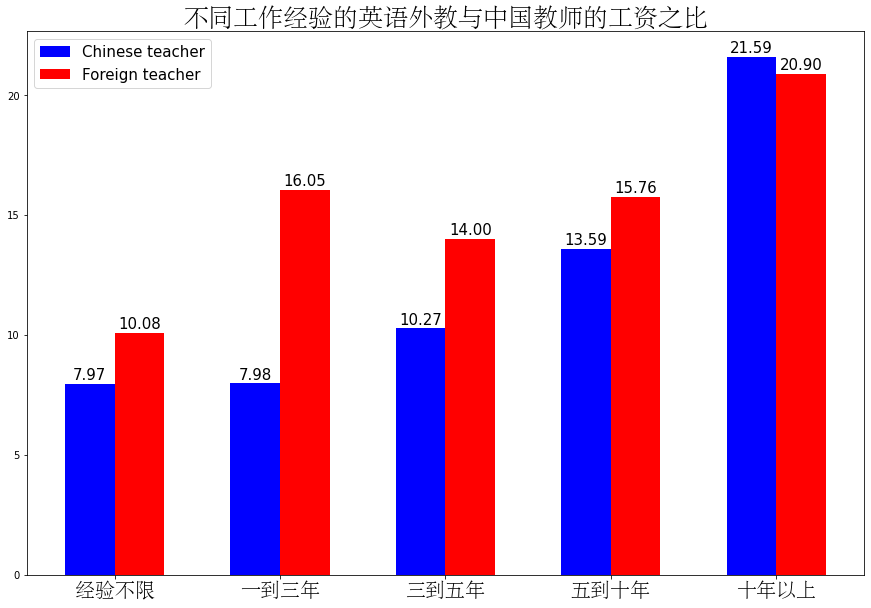

In [122]:
index=np.arange(5)
Cteacher=[7.97,7.98,10.27,13.59,21.59]
Fteacher=[10.08,16.05,14.00,15.76,20.90]
bar_width=0.3
plt.figure(figsize=(15,10))
plt.bar(index-0.15,Cteacher,color='b',width=0.3)
plt.bar(index+bar_width-0.15,Fteacher,color='r',width=0.3)
plt.legend(['Chinese teacher','Foreign teacher'],fontsize=15)
for x,y in zip(index,Cteacher):
    plt.text(x-0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
for x,y in zip(index,Fteacher):
    plt.text(x+0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
plt.xticks(index,['经验不限','一到三年','三到五年','五到十年','十年以上'],fontproperties='STSong',fontsize=20)
plt.title('不同工作经验的英语外教与中国教师的工资之比',fontproperties='STSong',fontsize=25)

### 在学历的基础上比较外教和中国教师的工资

#### 中国教师的工资

In [123]:
df.groupby(['degree'])['salary'].mean()

degree
中专       4.386000
大专       6.449041
学历不限     7.477545
本科       9.318532
硕士      11.031935
高中       4.500000
Name: salary, dtype: float64

#### 外教的工资

In [124]:
df_jbl.groupby(['education'])['salary_clean'].mean()

education
Any education    13.921179
Associate        12.750000
Bachelor         16.262945
Master           21.333333
Name: salary_clean, dtype: float64

#### 作图

Text(0.5, 1.0, '不同学历的英语外教与中国教师工资之比')

posx and posy should be finite values
posx and posy should be finite values


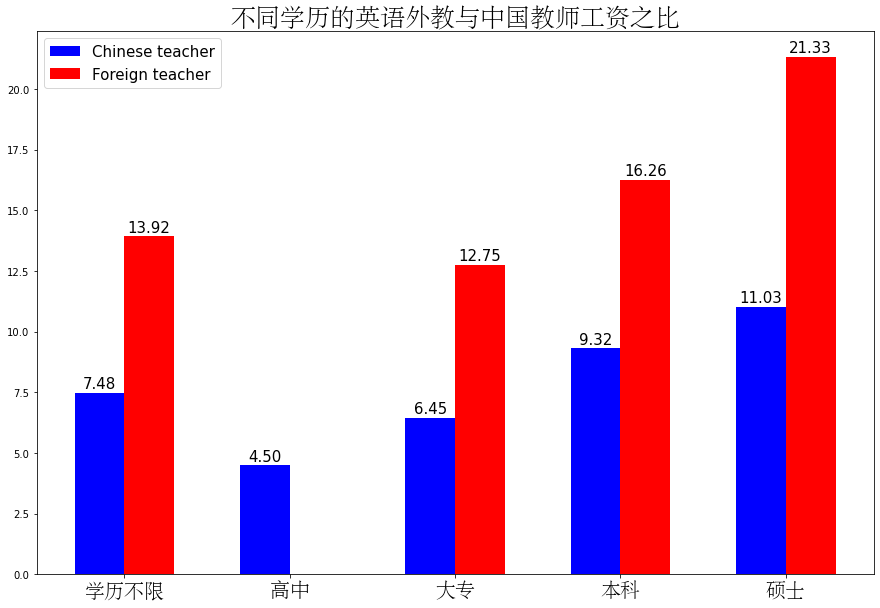

In [128]:
index=np.arange(5)
Cteacher=[7.48,4.50,6.45,9.32,11.03]
Fteacher=[13.92,np.nan,12.75,16.26,21.33]

bar_width=0.3
plt.figure(figsize=(15,10))
plt.bar(index-0.15,Cteacher,color='b',width=0.3)
plt.bar(index+bar_width-0.15,Fteacher,color='r',width=0.3)
plt.legend(['Chinese teacher','Foreign teacher'],fontsize=15)
for x,y in zip(index,Cteacher):
    plt.text(x-0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
for x,y in zip(index,Fteacher):
    plt.text(x+0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
plt.xticks(index,['学历不限','高中','大专','本科','硕士'],fontproperties='STSong',fontsize=20)
plt.title('不同学历的英语外教与中国教师工资之比',fontproperties='STSong',fontsize=25)

### 不同经验外教需求百分比

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/45NBuzDIW489QBoVep5mcSyl0BYFX31LVklcgbB8Cix4FasTQdEZ8xscNzasPXt5e7ArMAQnwLoke9G21MJyGTuUEVrYqD8XjTcosrnp1tA!/b&bo=NgEkAjYBJAIDGTw!&rf=viewer_4)

### 不同经验外教需求百分比

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/45NBuzDIW489QBoVep5mcSyl0BYFX31LVklcgbB8Cix4FasTQdEZ8xscNzasPXt5e7ArMAQnwLoke9G21MJyGS66FjTfzQSd7vd6RSb9uEA!/b&bo=NgEkAjYBJAIDGTw!&rf=viewer_4)

### 外教需求城市排名TOP10

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/45NBuzDIW489QBoVep5mcSyl0BYFX31LVklcgbB8Ciwf95D3tTzNTpqLpF9jPoot32iwf24lZ.MyV1s3FpsqrhDQaN.F1SqH3SgMY2LNHkI!/b&bo=kwIkApMCJAIDGTw!&rf=viewer_4)

### 城市排名TOP10的中国教师和外教工资对比

#### 选择城市

In [133]:
sel_city=df_jbl.area.value_counts().head(11).drop('Others')

#### 得到数据

In [135]:
a=df_jbl.groupby(['area'])['salary_clean'].mean()
b=df.groupby(['city'])['salary'].mean()

In [140]:
# 外教工资
a[a.index.isin(sel_city.index)]

area
Beijing      16.571262
Chengdu      15.625000
Chongqing    11.742857
Guangzhou    15.447368
Hangzhou     15.583146
Nanjing      10.800000
Qingdao      16.954545
Shanghai     16.423370
Shenzhen     17.536364
Wuhan        15.210526
Name: salary_clean, dtype: float64

#### 作图

In [144]:
a_value=[16.57,16.42,15.58,17.54,15.63,11.74,15.45,15.21,10.80,16.95]
b_value=[9.77,9.30,8.89,8.58,8.94,7.95,7.96,6.93,7.94,7.79]

Text(0.5, 1.0, '对外教需求排名前10的城市的外教和中教平均工资')

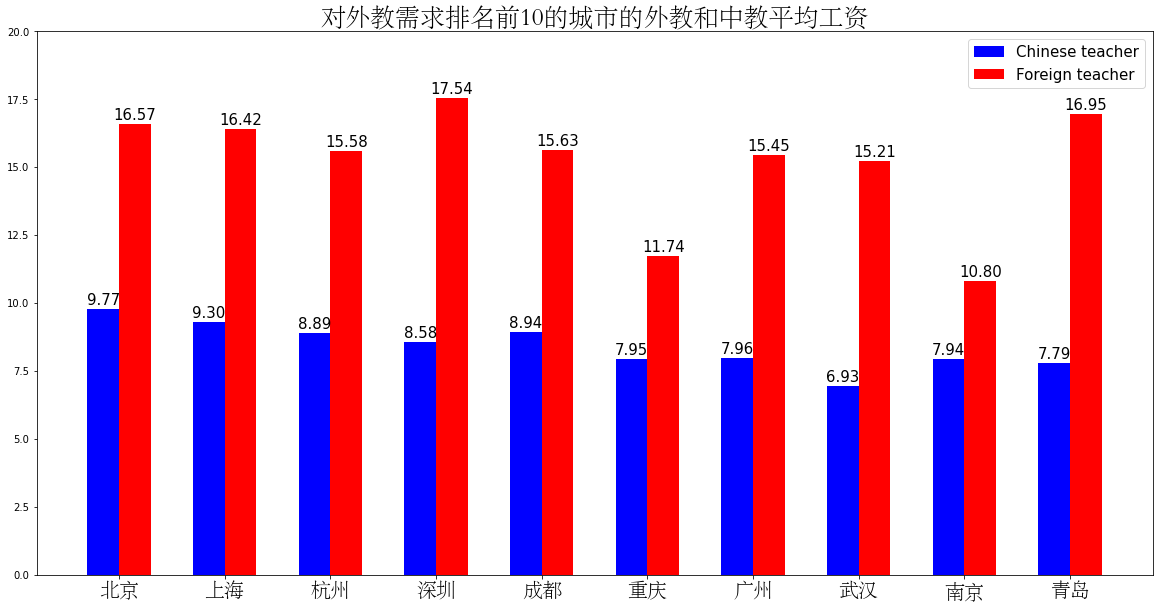

In [148]:
index=np.arange(10)
bar_width=0.3
plt.figure(figsize=(20,10))
plt.bar(index-0.15,b_value,color='b',width=0.3)
plt.bar(index+bar_width-0.15,a_value,color='r',width=0.3)
plt.legend(['Chinese teacher','Foreign teacher'],fontsize=15)
plt.ylim(0,20)
for x,y in zip(index,b_value):
    plt.text(x-0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
for x,y in zip(index,a_value):
    plt.text(x+0.15,y+0.05,'%.2f' %y, ha='center',va='bottom',fontsize=15)
plt.xticks(index,['北京','上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛'],fontproperties='STSong',fontsize=20)
plt.title('对外教需求排名前10的城市的外教和中教平均工资',fontproperties='STSong',fontsize=25)

### 外教需求单位类型TOP5

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/45NBuzDIW489QBoVep5mcY6wOeAP6.hazXckYb9fx.bgYEz4pYIod.H.7o1fcfb6gbLKOfnUOTutooc4IhPhhz4YuQQIYObMAqBFSFv9YQA!/b&bo=YAFAAmABQAIDGTw!&rf=viewer_4)

### 外教性别比例

![](http://m.qpic.cn/psc?/V509KgjP2rVc1x3xXZE72dVD4k46B5pi/45NBuzDIW489QBoVep5mcSyl0BYFX31LVklcgbB8CizeS5q2vcKLs1vLfjJGdMoQop29Y.mySjrv50vZIikrmbK94vhuea.WCJPUmAyOGsk!/b&bo=.AQkAvgEJAIDGTw!&rf=viewer_4)